# ***Stock price predication on Canara Bank Banking company***

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

***We can download Any current stock Historical Prices from https://finance.yahoo.com/ This url.***

In this project i worked on **Canara Bank
Banking company** stock price using https://finance.yahoo.com/quote/CANBK.NS/history?p=CANBK.NS this url we can download or provide direct url to using this historical data.

***Read the dataset***

In [2]:
dataset=pd.read_csv('CANBK.NS.csv')

***Check avaliable columns***

In [9]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

***Read the first 10 rows from our dataset***

In [3]:
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-12,162.750000,164.199997,155.550003,157.000000,157.000000,15901414
1,2021-03-15,157.500000,159.000000,151.750000,158.300003,158.300003,15611384
2,2021-03-16,159.000000,159.899994,154.250000,157.550003,157.550003,15486161
3,2021-03-17,157.100006,158.149994,149.199997,150.250000,150.250000,17552475
4,2021-03-18,152.800003,154.800003,143.100006,146.600006,146.600006,20262104
5,2021-03-19,144.500000,152.399994,141.399994,151.000000,151.000000,23896696
6,2021-03-22,151.000000,154.250000,147.500000,150.000000,150.000000,19111354
7,2021-03-23,150.949997,156.449997,148.600006,153.850006,153.850006,21421629
8,2021-03-24,152.649994,154.649994,147.550003,148.350006,148.350006,13974005
9,2021-03-25,148.600006,150.500000,137.050003,143.399994,143.399994,33493070


In [10]:
dataset['Date'] = pd.to_datetime(dataset.Date)
dataset.shape

(249, 6)

***We can drop unnecessary columns from our dataset
here I drop 'Adj close' from our dataset***

In [5]:
dataset.drop('Adj Close',axis = 1, inplace = True)
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2021-03-12,162.750000,164.199997,155.550003,157.000000,15901414
1,2021-03-15,157.500000,159.000000,151.750000,158.300003,15611384
2,2021-03-16,159.000000,159.899994,154.250000,157.550003,15486161
3,2021-03-17,157.100006,158.149994,149.199997,150.250000,17552475
4,2021-03-18,152.800003,154.800003,143.100006,146.600006,20262104


***Check in dataset is there any null value avaliable or not 
if yes then provide the appropriate values(like average,mean,mode,median of that column).***

In [6]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   Open    249 non-null    float64       
 2   High    249 non-null    float64       
 3   Low     249 non-null    float64       
 4   Close   249 non-null    float64       
 5   Volume  249 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [12]:
dataset.describe()

,Open,High,Low,Close,Volume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,180.572289,184.208433,177.201607,180.611847,1.701857e+07
std,35.206158,36.107060,34.537599,35.460258,1.081519e+07
min,125.800003,129.800003,124.300003,128.050003,4.384463e+06
25%,152.750000,155.149994,150.000000,152.199997,9.377338e+06
50%,161.000000,163.199997,158.100006,160.800003,1.390950e+07
75%,212.899994,216.000000,208.449997,212.199997,2.006548e+07
max,268.700012,272.799988,264.100006,269.649994,7.226811e+07


In [13]:
print(len(dataset))

249


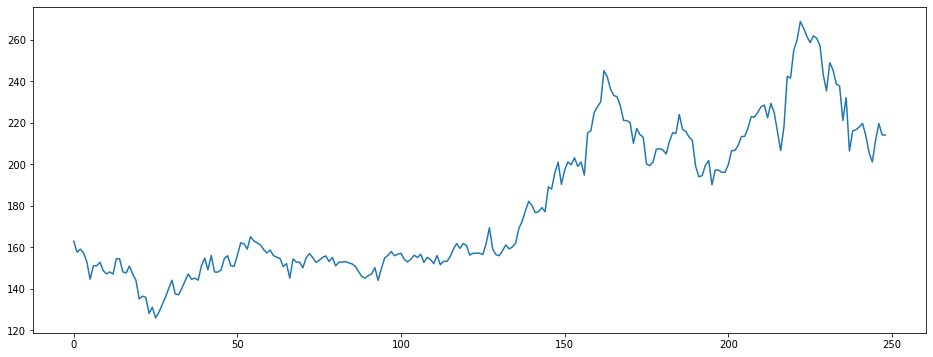

In [14]:
dataset['Open'].plot(figsize=(16,6))

***For Data visualization***

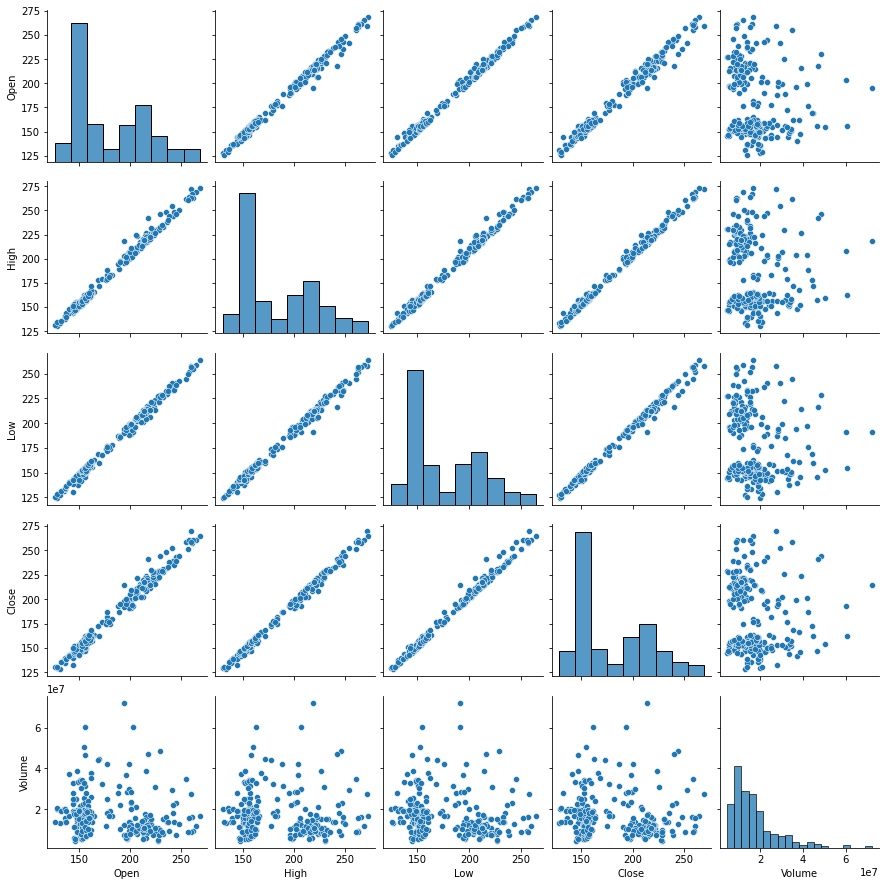

In [17]:
sns.pairplot(dataset)

***For individual column Data visualization***

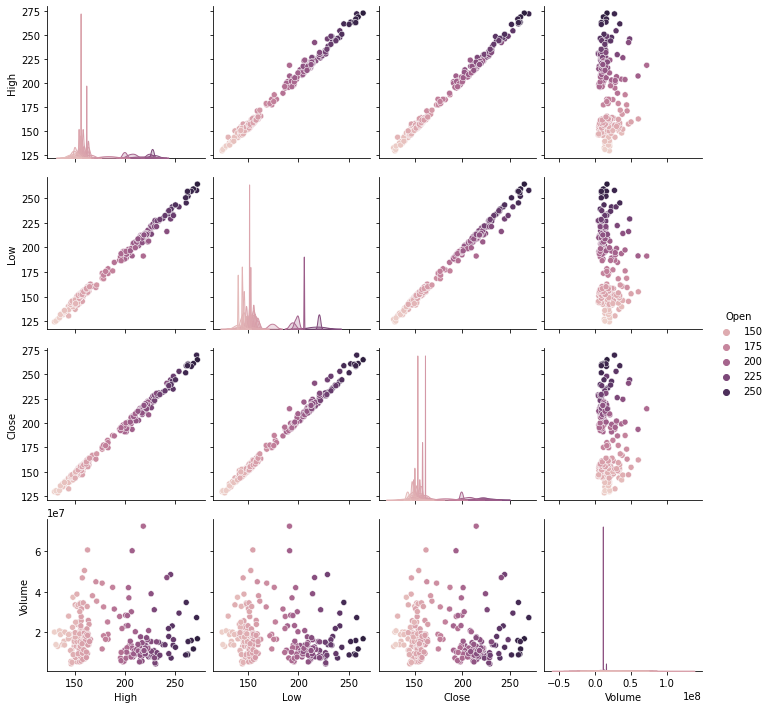

In [19]:
sns.pairplot(dataset,hue='Open')

In [20]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

***# train_test_split***

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [22]:
X_train.shape

(186, 4)

In [23]:
X_test.shape

(63, 4)

***# LinearRegression***

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
print(regressor.coef_)

[-5.89285367e-01  9.02764026e-01  6.83984703e-01 -2.83048630e-08]


In [27]:
print(regressor.intercept_)

0.05431121318545706


In [28]:
predicted=regressor.predict(X_test)

In [29]:
print(X_test)

           Open        High         Low    Volume
248  214.000000  219.399994  212.500000  10953726
168  221.000000  226.500000  219.500000  15383307
76   155.000000  156.500000  153.449997   9356682
150  197.100006  201.000000  192.250000  28400298
145  189.000000  189.649994  184.649994  31426577
..          ...         ...         ...       ...
146  187.899994  195.000000  186.899994  27769060
160  227.649994  231.000000  227.000000   4384463
214  224.899994  226.699997  213.300003  10638551
126  161.600006  167.800003  160.449997  37965546
59   157.100006  159.399994  155.649994  11326908

[63 rows x 4 columns]


In [30]:
predicted.shape

(63,)

In [31]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(dfr)

         Actual   Predicted
248  217.949997  217.050370
168  220.050003  223.997517
76   155.800003  154.690261
150  199.600006  196.053924
145  186.600006  185.296815
..          ...         ...
146  193.550003  192.417317
160  228.800003  229.582417
214  215.600006  217.773454
126  166.750000  164.980333
59   156.949997  157.519765

[63 rows x 2 columns]


***Check first 15 rows Actual and Predicted dataset***

In [32]:
dfr.head(15)

,Actual,Predicted
248,217.949997,217.050370
168,220.050003,223.997517
76,155.800003,154.690261
150,199.600006,196.053924
145,186.600006,185.296815
73,151.850006,152.196403
45,152.850006,151.477886
159,225.949997,225.897542
218,238.899994,238.663697
213,228.449997,229.640245


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
regressor.score(X_test,y_test)

0.9971354914065779

In [35]:
import math
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 1.5404498027384914


In [36]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 3.7267774387424875


In [37]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.930486321822169


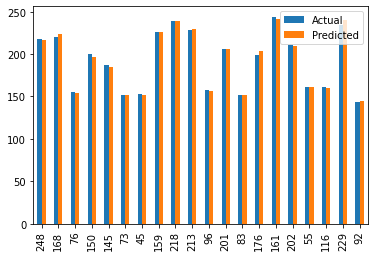

In [38]:
graph=dfr.head(20)
graph.plot(kind='bar')